In [14]:
import numpy as np
import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Preprocessing Functions

In [3]:
def load_dat(path):
    print('Loading "%s" ...' % path)
    with open(path, 'rb') as f:
        n, k = np.fromfile(f, dtype=np.int32, count=2)
        dat = np.fromfile(f, dtype=np.float32, count=n*k).reshape((n, k))
        # Make sure that we've reached EOF
        assert len(f.read(1)) == 0
    print('=> shape: (%d, %d)' % dat.shape)

    # Transpose `dat` to make summations over data index fast.
    # Convert to double precision because PCA turned out a bit unstable with single precision.
    return dat.T.astype(np.float64)

In [4]:
def fit_pca(dat, out_ks=[16, 32, 64]):
    mean = dat.mean(axis=1, keepdims=True)
    normalized = dat - mean
    variance = (normalized ** 2).mean(axis=1, keepdims=True)
    cov_unscaled = normalized.dot(normalized.T) / normalized.shape[1]
    normalized /= np.sqrt(variance)
    cov_scaled = normalized.dot(normalized.T) / normalized.shape[1]
    del normalized

    assert np.allclose(np.diag(cov_unscaled), variance[:, 0])
    assert np.allclose(np.diag(cov_scaled), np.ones((variance.shape[0],)))
    
    eigvals, eigvecs = np.linalg.eigh(cov_scaled)
    assert np.allclose(eigvecs.dot(np.diag(eigvals)).dot(eigvecs.T), cov_scaled)
    assert np.allclose(eigvecs.T.dot(cov_scaled).dot(eigvecs), np.diag(eigvals))
    
    transform = eigvecs.T.copy() / np.sqrt(variance.reshape((1, -1)) * eigvals.reshape((-1, 1)))
    assert np.allclose(transform.dot(cov_unscaled).dot(transform.T), np.eye(len(eigvals)))
    
    fig, ax = plt.subplots()
    ax.plot(range(len(eigvals), 0, -1), eigvals)
    for k in out_ks:
        ax.plot((k, k), (eigvals[0], eigvals[-1]), ':', label='k=%d' % k)
    ax.set_yscale('log')
    ax.legend()    
    
    return mean, transform

In [5]:
def reduce_dim(dat, mean, transform, base_out_path, out_ks=[16, 32, 64]):
    for k in out_ks:
        small = transform[-k:, :].dot(dat - mean).T.astype(np.float32)
        out_path = '%s-k%d.np' % (base_out_path, k)
        print('Saving (%d, %d) array to "%s" ...' % tuple(list(small.shape) + [out_path]))
        with open(out_path, 'wb') as out_file:
            np.array(small.shape, dtype=np.int32).tofile(out_file)
            small.tofile(out_file)
    print('Done.')

## Process Wikipedia-500K

In [6]:
wdat = load_dat('../../dat/Wikipedia-500K/train-features-full.np')

Loading "../../dat/Wikipedia-500K/train-features-full.np" ...
=> shape: (1646302, 512)


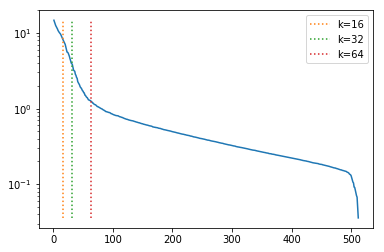

In [7]:
wmean, wtransform = fit_pca(wdat)

In [8]:
reduce_dim(wdat, wmean, wtransform, '../../dat/Wikipedia-500K/train-features')

Saving (1646302, 16) array to "../../dat/Wikipedia-500K/train-features-k16.np" ...
Saving (1646302, 32) array to "../../dat/Wikipedia-500K/train-features-k32.np" ...
Saving (1646302, 64) array to "../../dat/Wikipedia-500K/train-features-k64.np" ...
Done.


In [9]:
del wdat

In [10]:
wdat_valid = load_dat('../../dat/Wikipedia-500K/valid-features-full.np')
reduce_dim(wdat_valid, wmean, wtransform, '../../dat/Wikipedia-500K/valid-features')

Loading "../../dat/Wikipedia-500K/valid-features-full.np" ...
=> shape: (135946, 512)
Saving (135946, 16) array to "../../dat/Wikipedia-500K/valid-features-k16.np" ...
Saving (135946, 32) array to "../../dat/Wikipedia-500K/valid-features-k32.np" ...
Saving (135946, 64) array to "../../dat/Wikipedia-500K/valid-features-k64.np" ...
Done.


In [11]:
del wdat_valid

In [12]:
wdat_test = load_dat('../../dat/Wikipedia-500K/test-features-full.np')
reduce_dim(wdat_test, wmean, wtransform, '../../dat/Wikipedia-500K/test-features')

Loading "../../dat/Wikipedia-500K/test-features-full.np" ...
=> shape: (543784, 512)
Saving (543784, 16) array to "../../dat/Wikipedia-500K/test-features-k16.np" ...
Saving (543784, 32) array to "../../dat/Wikipedia-500K/test-features-k32.np" ...
Saving (543784, 64) array to "../../dat/Wikipedia-500K/test-features-k64.np" ...
Done.


In [13]:
del wdat_test, wmean, wtransform

## Process Amazon-670K

In [38]:
adat = load_dat('../../dat/Amazon-670K/train-features-full.np')

Loading "../../dat/Amazon-670K/train-features-full.np" ...
=> shape: (490449, 512)


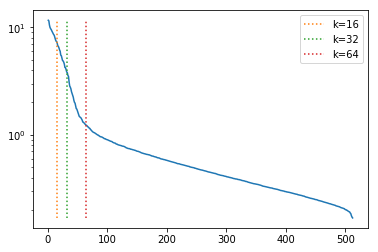

In [39]:
amean, atransform = fit_pca(adat)

In [42]:
reduce_dim(adat, amean, atransform, '../../dat/Amazon-670K/train-features')

Saving (490449, 16) array to "../../dat/Amazon-670K/train-features-k16.np" ...
Saving (490449, 32) array to "../../dat/Amazon-670K/train-features-k32.np" ...
Saving (490449, 64) array to "../../dat/Amazon-670K/train-features-k64.np" ...
Done.


In [43]:
del adat

In [44]:
adat_valid = load_dat('../../dat/Amazon-670K/valid-features-full.np')
reduce_dim(adat_valid, amean, atransform, '../../dat/Amazon-670K/valid-features')

Loading "../../dat/Amazon-670K/valid-features-full.np" ...
=> shape: (25845, 512)
Saving (25845, 16) array to "../../dat/Amazon-670K/valid-features-k16.np" ...
Saving (25845, 32) array to "../../dat/Amazon-670K/valid-features-k32.np" ...
Saving (25845, 64) array to "../../dat/Amazon-670K/valid-features-k64.np" ...
Done.


In [45]:
del adat_valid

In [46]:
adat_test = load_dat('../../dat/Amazon-670K/test-features-full.np')
reduce_dim(adat_test, amean, atransform, '../../dat/Amazon-670K/test-features')

Loading "../../dat/Amazon-670K/test-features-full.np" ...
=> shape: (103381, 512)
Saving (103381, 16) array to "../../dat/Amazon-670K/test-features-k16.np" ...
Saving (103381, 32) array to "../../dat/Amazon-670K/test-features-k32.np" ...
Saving (103381, 64) array to "../../dat/Amazon-670K/test-features-k64.np" ...
Done.


In [47]:
del adat_test, amean, atransform